File Contains two Algorithms the first is Deutsche's algorithm which given an arbitrary function f:{0,1}-->{0,1} determines whether the function is constant or balanced. The second of the two algorithms is the Deutsche-Jozsa algorithm which generalizes Deutsches algorithm to a function f:{0,1}^n-->{0,1}.

In [2]:
# imports
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import UnitaryGate
from qiskit import transpile
from qiskit_ibm_provider import IBMProvider
import numpy as np

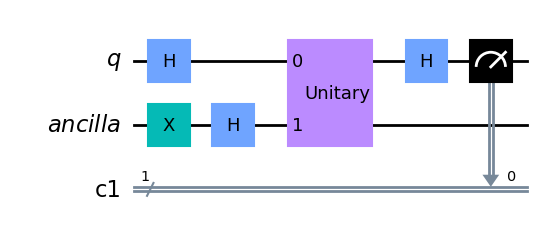

In [5]:
# Caleb Smith
# 09/25/2023
# Deutsche's algorithm
# this cell of code sets up and displays a general circuit for Deutsche's algorithm
# define registers
q_reg1 = QuantumRegister(1, "q")
q_reg2 = QuantumRegister(1, "ancilla")
c_reg = ClassicalRegister(1, "c1")
# initialize circuit with q_reg1 in the 0 state and q_reg2 in the 1 state
circ = QuantumCircuit(q_reg1, q_reg2, c_reg)
circ.x(1)

# put both qubits in the superposition state
circ.h(qubit=0)
circ.h(qubit=1)

# define a unitary matrix to represent the function f:{0, 1}-->{0, 1}
u_f = UnitaryGate(np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 1, 0, 0], [0, 0, 1, 0]]))
circ.append(u_f, [0, 1])

# apply a hadamard to q_reg1 to rotate the phase then measure the output
circ.h(0)
circ.measure(0, 0)

# display the circuit
display(circ.draw("mpl"))

This cell sets up the job and runs deutsche's algorithm on a quantum simulator backend

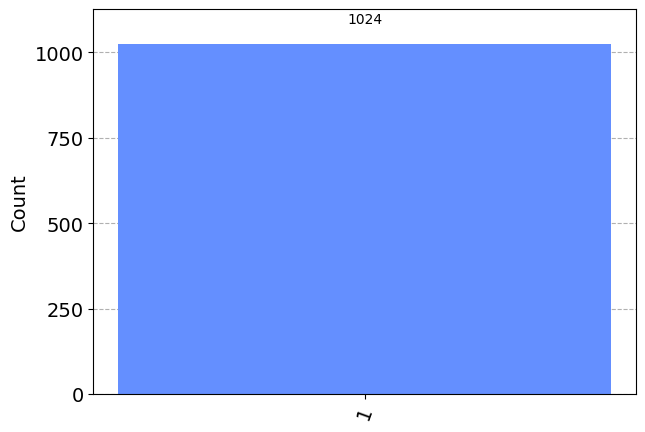

In [6]:
simulator = BasicAer.get_backend('qasm_simulator')
job = execute(circ, simulator)
result = job.result()
display(plot_histogram(result.get_counts()))

This cell sets up the job and runs deutsche's algorithm on a quantum backend

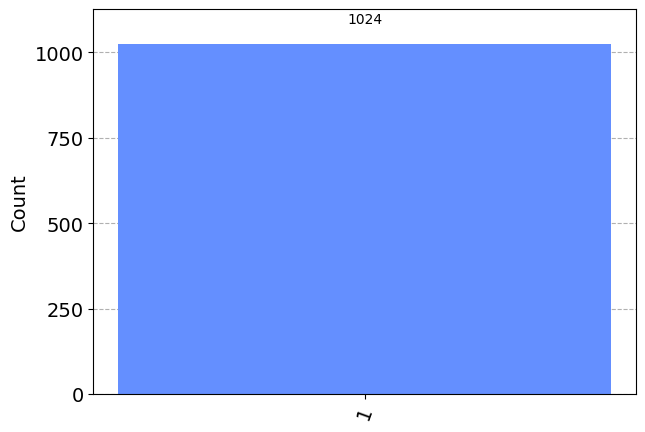

In [10]:
provider = IBMProvider()
backend = provider.get_backend("ibm_nairobi")
transpiled = transpile(circ, backend=backend)
job = backend.run(transpiled)
retrieved_job = provider.backend.retrieve_job(job.job_id())
retrieved_job.result()
display(plot_histogram(result.get_counts()))